# Inversion Sampling

To generate uniform samples from given *R*, we need to use inversion sampling.

\begin{array}{@{} r @{} c @{} l @{} }
&R \sim p(r) &{}=\displaystyle
\begin{cases}
2r & 0 \le r \le 1\\
0 &otherwise
\end{cases}
\end{array}

Our Probability Density Function is written above and we need to obtain Cumulative Distribution Function. The CDF is found as

$$F(r) = \int_{0}^{r} 2x dx = r^{2}$$

The generalised inverse is obtained via

$$u = F(r) = r^{2}\\
r = \sqrt{u}$$

Now we can generate *u* uniformly on \[0, 1\] and find the corresponding \(x\) via the generalised inverse $F^{-}(u)$. $\theta$ is already uniformly distributed between $[0, 2\pi]$, therefore we don’t need to use inversion. We only need to generate a random number between 0 and 1 and multiply it by $2\pi$.

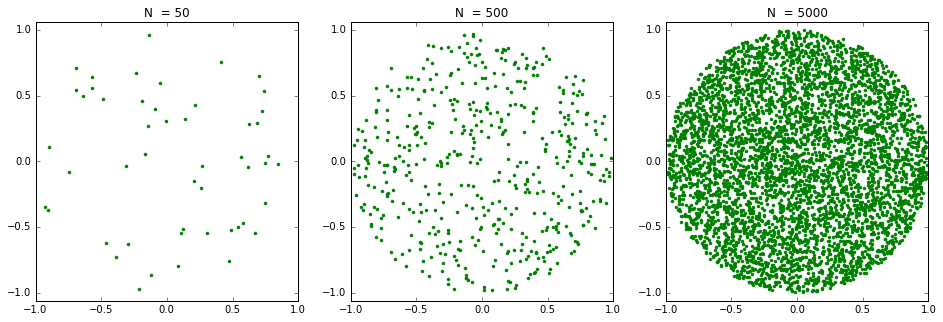

In [165]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

points = []
n = 5000

for i in range(n):
    r = np.sqrt(np.random.rand())
    theta = 2 * np.random.rand() * np.pi
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    points.append((x,y))
    
x = [i[0] for i in points]
y = [i[1] for i in points]
    
f, subplot = plt.subplots(1,3, figsize=(16,5))
    
for i in range(3):
    lmt = int(n / np.power(10, 2-i))
    subplot[i].plot(x[:lmt], y[:lmt], '.g')
    subplot[i].axis('equal')
    subplot[i].set_title('N  = ' + str(lmt))

# Rejection Sampling

For rejection sampling, we can use uniform samples from a circular region as a *proposal* distribution. We already generated those distribution in the previous section, so we can use those results in rejection sampling. Efficiency can be found via dividing number of accepted samples by number of total samples.

## Closed unit ball for *p* = 1.5

(-1.5, 1.5, -1.5, 1.5)

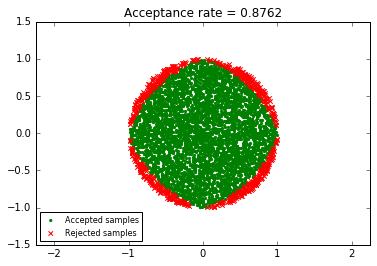

In [166]:
accepted_15 = []
rejected_15 = []

def accept_reject(x, y, p):
    return np.power((np.power(np.absolute(x),p) + np.power(np.absolute(y),p)), (1/p)) <= 1

for i in range(n):
    if (accept_reject(x[i], y[i], 1.5)):
        accepted_15.append(points[i])
    else:
        rejected_15.append(points[i])

pos = plt.scatter(*zip(*accepted_15), color = 'g', marker = '.')
neg = plt.scatter(*zip(*rejected_15), color = 'r', marker = 'x')
plt.title('Acceptance rate = ' + str(len(accepted_15)/float(n)))
plt.legend((pos, neg),
           ('Accepted samples', 'Rejected samples'),
          scatterpoints = 1,
          loc = 'lower left',
          fontsize = 8)
plt.axis('equal')

## Closed unit ball for *p* = 0.7

(-1.5, 1.5, -1.5, 1.5)

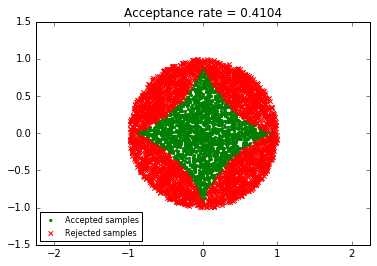

In [167]:
accepted_07 = []
rejected_07 = []

def accept_reject(x, y, p):
    return np.power((np.power(np.absolute(x),p) + np.power(np.absolute(y),p)), (1/p)) <= 1

for i in range(n):
    if (accept_reject(x[i], y[i], 0.7)):
        accepted_07.append(points[i])
    else:
        rejected_07.append(points[i])

pos = plt.scatter(*zip(*accepted_07), color = 'g', marker = '.', label = 'accepted samples')
neg = plt.scatter(*zip(*rejected_07), color = 'r', marker = 'x')
plt.title('Acceptance rate = ' + str(len(accepted_07)/float(n)))
plt.legend((pos, neg),
           ('Accepted samples', 'Rejected samples'),
          scatterpoints = 1,
          loc = 'lower left',
          fontsize = 8)
plt.axis('equal')

## Closed unit ball for *p* = 0.7 with better efficiency

What we can do to have better efficiency for *p* = 0.7 is having a better proposal.

For *p*-norms, when $p < 1$, the *superellipse* becomes more and more concave and vica versa, when *p* goes from 1 to infinity, the superellipse grows outward to have a more convex shape. In our case, since the *p*-norm is smaller than 1, it is concave. Instead of using a unit circle as our proposal, we can find a better shape. That shape can be a *p*-norm shape with *p* = 1. The plot below is the graphical representation of *p* = 1.

(-1.5, 1.5, -1.5, 1.5)

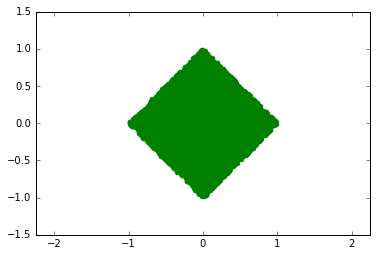

In [168]:
sample_points = []

for i in range(n):
    x = np.sqrt(2) * (np.random.rand() - 0.5)
    y = np.sqrt(2) * (np.random.rand() - 0.5)
    
    rotMatrix = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)], 
                   [np.sin(np.pi/4),  np.cos(np.pi/4)]])
    
    vector = np.array([x, y])
    vector = rotMatrix.dot(vector)
    sample_points.append(vector)
    
plt.scatter(*zip(*sample_points), color = 'g', marker = 'o')
plt.axis('equal')

It is clear that this shape would be a better proposal than a unit circle. Of course, we need to prove it. We will generate *n* sample points that is within *1*-norm, and use our acceptance-rejection comparison to sample points for *0.7*-norm.

We can easily see that this *1*-norm shape is special, it is a square centered on origin, but it is rotated $\frac{\pi}{4}$ degrees and its diagonal distance is 2. In other words, it a square with side $a = \sqrt{2}$ and it is rotated $\frac{\pi}{4}$ degrees.

Now that we have our sample points, we can use rejection sampling to get a better efficiency for *p* = 0.7.

(-1.5, 1.5, -1.5, 1.5)

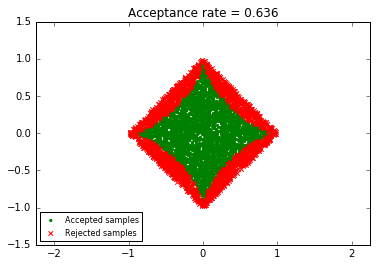

In [169]:
accepted = []
rejected = []

for point in sample_points:
    if (accept_reject(point[0], point[1], 0.7)):
        accepted.append(point)
    else:
        rejected.append(point)
        
pos = plt.scatter(*zip(*accepted), color = 'g', marker = '.', label = 'accepted samples')
neg = plt.scatter(*zip(*rejected), color = 'r', marker = 'x')
plt.title('Acceptance rate = ' + str(len(accepted)/float(n)))
plt.legend((pos, neg),
           ('Accepted samples', 'Rejected samples'),
          scatterpoints = 1,
          loc = 'lower left',
          fontsize = 8)
plt.axis('equal')

We see that our acceptance rate has increased to around ~0.63 from ~0.41. Thus we can say that our approach to increase efficiency works.

# Bonus

## Generating uniformly distributed points on unit n-sphere

To generate uniformly distributed points on a unit n-sphere, we firstly need direction and distance. To obtain a random direction uniformly in n-dimensional space, we can generate a sample from n-variate gaussian distribution with identity covariance matrix, and normalize the resulting vector (as told in homework description). 

After that, we can generate distance from origin by generating a uniformly distributed number. But there is a simple adjustment that needs to be done, and that is satisfying the uniformity of the joint distribution. If we just generate uniformly distributed numbers between 0 and 1, the sphere will have its samples more in the center. As we did in the first part of the assignment, we need to make sure that there won't be a cluster in the center and we generate more samples farther from origin. For 2-D, we used $x^{1/2}$. For n-dimension, it will be $x^{1/n}$ and we will generate n numbers.

To illustrate, let's generate samples of 3-sphere and plot it.

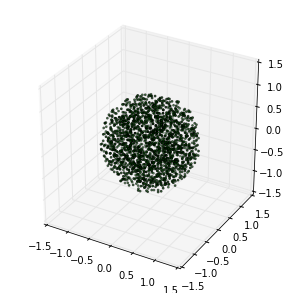

In [170]:
from mpl_toolkits.mplot3d import Axes3D

n_samples = 2000

# Function to normalize a vector.
def normalize(vector):
    length = np.sqrt(np.sum(i*i for i in vector))
    return vector / length

def generate_samples(n):
    # Generate identity covariance matrix.
    cov = np.matrix(np.identity(n))
    # Draw random samples from a multivariate normal distribution. Mean will be zero, variance will be identity matrix.
    directions = np.random.multivariate_normal(np.zeros(n), cov, n_samples)
    # Normalize the generated vectors and multiply direction vectors by random samples from uniform distribution.
    directions = [normalize(vector) * np.power(np.random.rand(), (1/n)) for vector in dirs]
    return directions

# Generate 3-dimension samples
directions = generate_samples(3)
# Separate x, y and z coordinates for plotting.
xs = [x[0] for x in directions]
ys = [x[1] for x in directions]
zs = [x[2] for x in directions]

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, zdir='z', s=3, c='g')

Let's also see the cross-section of xs and ys in the 3D plot.

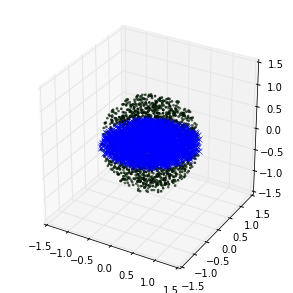

In [178]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, zdir='z', s=3, c='g')
plt.plot(xs, ys, 'xb')

Also, let's look at it from the top.

(-1.0, 1.0, -1.0, 1.0)

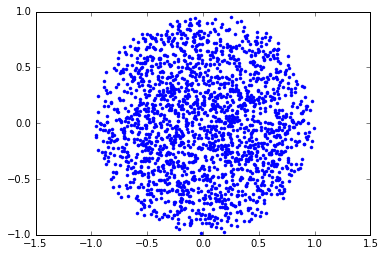

In [179]:
plt.plot(xs, ys, '.b')
plt.axis('equal')

## Rejection Sampling for n-spheres

Now let's use rejection sampling method for generating uniformly distributed samples for n-spheres. We can generate samples first, then compare them with the volume of n-dimensional hypercube.

Volume of n-sphere is given as follows: 

\begin{array}{@{} r @{} c @{} l @{} }
&V &{}=\displaystyle
\begin{cases}
\Large \frac{{(2\pi)}^{n/2} r^{n}}{2 \times 4 \times \cdot \cdot \cdot \times (n-2)} & \text{n is even} \\
\\
\Large \frac{2 {(2\pi)}^{(n-1)/2} r^{n}}{1 \times 3 \times \cdot \cdot \cdot \times n} & \text{n is odd}
\end{cases}
\end{array}

Volume of hypercube is $r^n$.

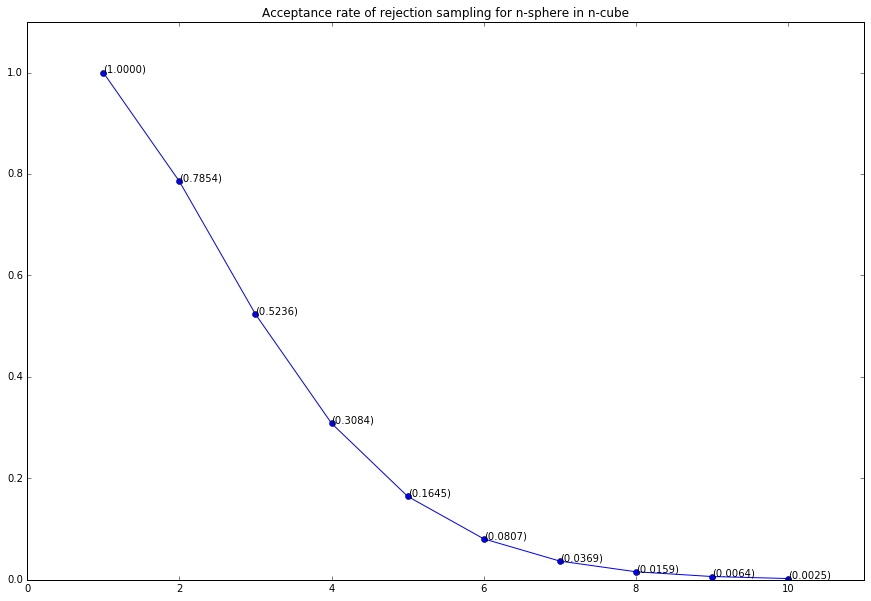

In [180]:
import operator
import functools
from pylab import rcParams

def volume_sphere(r, n):
    dividend = 1
    dividor = 1
    if (n % 2 == 1):
        l = range(1, n+1)
        l = l[::2]
        dividend = 2 * np.power((2*np.pi), ((n-1)/2)) * np.power(r, n)
        dividor = functools.reduce(operator.mul, l, 1)
    else:
        l = list(range(2, n+1))
        l = l[::2]
        dividend = np.power((2*np.pi), (n/2)) * np.power(r, n)
        dividor = functools.reduce(operator.mul, l, 1)
        
    return dividend/dividor
    
def volume_cube(r, n):
    return np.power(r, n)
    
acceptances = []
ns = list(range(1, 11))
r = 1
for i in range(1, 11):
    sphere = volume_sphere(r, i)
    cube = volume_cube(2*r, i)
    acceptances.append(sphere / cube)
    
rcParams['figure.figsize'] = 15,10
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(ns, acceptances, 'o-')
plt.axis([0, 11, 0, 1.1])
plt.title("Acceptance rate of rejection sampling for n-sphere in n-cube")

for i, val in enumerate(acceptances):
    ax.annotate('(%.4f)' % val, (ns[i], acceptances[i]))

We can easily say that acceptance rate decreases rapidly as n increases. Table from my results is as follows:

| n | Acceptance | n  | Acceptance |
|---|------------|----|------------|
| 1 | 1.0000     | 6  | 0.0807     |
| 2 | 0.7854     | 7  | 0.0369     |
| 3 | 0.5236     | 8  | 0.0159     |
| 4 | 0.3084     | 9  | 0.0064     |
| 5 | 0.1645     | 10 | 0.0025     |